**stage1: Processes to Developing an ML Model**
**1. Prepare the data.**
*-data preprocessing*
*-Fltering*
*-check for anf remove duplicates*

***This stage produces the base data on which the model will be trained on***



***Stage2: Train the model. select our model. Tokenize the base data. training***

***Stage3: validate the model. Benchmark it. create a model path***

***Stage4: Tune. fine-tuning***

***stage5: Deploy or embed it into an application***

***Import Libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix






***Stage1: Explore the data***

***Load the data file***

In [2]:
df = pd.read_csv("scholarship_dataset.csv")

df

,gpa,sat_score,family_income,extracurriculars,leadership,volunteer_hours,essay_score,recommendation_strength,region,first_gen,eligibility_score,eligible,wassce_score,admitted
0,3.381849,1030,20108.08,0,1,74,6.912840,5,Urban,1,85.250377,1,438,0
1,3.356388,993,13647.42,2,0,173,4.354914,3,Urban,1,87.078688,1,355,1
2,2.967695,1494,15813.18,2,0,287,0.000000,3,Urban,0,97.662553,1,478,0
3,2.984260,1395,15510.76,3,1,62,9.789387,4,Rural,0,96.862836,1,548,1
4,3.106996,1001,3012.32,3,1,43,3.863034,2,Urban,0,83.944966,1,478,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4.068133,1015,5534.27,0,0,118,0.000000,5,Rural,1,97.119236,1,403,1
19996,3.091849,900,15214.05,5,0,102,0.000000,3,Urban,0,65.148021,0,385,0
19997,2.950494,1528,1004.37,2,0,104,3.258586,2,Urban,0,100.000000,1,512,1
19998,3.459460,1419,8685.10,3,1,162,3.503103,5,Rural,0,100.000000,1,425,1


***Number of rows and columns***

In [3]:
df.shape # show number of rows and columns

(20000, 14)

***Clean the data***
*remove duplicate values if they exist*

In [4]:
df.drop_duplicates(inplace=True)

***check if there are any missing values in the entire DataFrame***

In [5]:
df.isnull().values.any()
df


,gpa,sat_score,family_income,extracurriculars,leadership,volunteer_hours,essay_score,recommendation_strength,region,first_gen,eligibility_score,eligible,wassce_score,admitted
0,3.381849,1030,20108.08,0,1,74,6.912840,5,Urban,1,85.250377,1,438,0
1,3.356388,993,13647.42,2,0,173,4.354914,3,Urban,1,87.078688,1,355,1
2,2.967695,1494,15813.18,2,0,287,0.000000,3,Urban,0,97.662553,1,478,0
3,2.984260,1395,15510.76,3,1,62,9.789387,4,Rural,0,96.862836,1,548,1
4,3.106996,1001,3012.32,3,1,43,3.863034,2,Urban,0,83.944966,1,478,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4.068133,1015,5534.27,0,0,118,0.000000,5,Rural,1,97.119236,1,403,1
19996,3.091849,900,15214.05,5,0,102,0.000000,3,Urban,0,65.148021,0,385,0
19997,2.950494,1528,1004.37,2,0,104,3.258586,2,Urban,0,100.000000,1,512,1
19998,3.459460,1419,8685.10,3,1,162,3.503103,5,Rural,0,100.000000,1,425,1


***Remove all rows from the data that contain any missing values***

In [6]:
df.dropna(inplace=True)  
df.head()


,gpa,sat_score,family_income,extracurriculars,leadership,volunteer_hours,essay_score,recommendation_strength,region,first_gen,eligibility_score,eligible,wassce_score,admitted
0,3.381849,1030,20108.08,0,1,74,6.912840,5,Urban,1,85.250377,1,438,0
1,3.356388,993,13647.42,2,0,173,4.354914,3,Urban,1,87.078688,1,355,1
2,2.967695,1494,15813.18,2,0,287,0.000000,3,Urban,0,97.662553,1,478,0
3,2.984260,1395,15510.76,3,1,62,9.789387,4,Rural,0,96.862836,1,548,1
4,3.106996,1001,3012.32,3,1,43,3.863034,2,Urban,0,83.944966,1,478,0


***Check columns names, number of rows and columns, data types of each column (int, float, object, etc.)***
**Number of non-null (non-missing) values in each column and how much memory the dataset is using**



In [7]:
df.info()    # Check column names and data types




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gpa                      20000 non-null  float64
 1   sat_score                20000 non-null  int64  
 2   family_income            20000 non-null  float64
 3   extracurriculars         20000 non-null  int64  
 4   leadership               20000 non-null  int64  
 5   volunteer_hours          20000 non-null  int64  
 6   essay_score              20000 non-null  float64
 7   recommendation_strength  20000 non-null  int64  
 8   region                   20000 non-null  object 
 9   first_gen                20000 non-null  int64  
 10  eligibility_score        20000 non-null  float64
 11  eligible                 20000 non-null  int64  
 12  wassce_score             20000 non-null  int64  
 13  admitted                 20000 non-null  int64  
dtypes: float64(4), int64(9

***Assess basic statistic features about the data***

In [8]:
df.describe()     # See basic statistice of the data

,gpa,sat_score,family_income,extracurriculars,leadership,volunteer_hours,essay_score,recommendation_strength,first_gen,eligibility_score,eligible,wassce_score,admitted
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,3.198647,1186.624900,10282.492188,2.612000,0.308000,144.082850,6.034677,3.074000,0.396000,88.421850,0.810000,453.823100,0.482000
std,0.393096,234.676278,5050.470177,1.697528,0.461678,85.404986,4.839344,1.400222,0.489077,14.746808,0.392311,83.648823,0.499688
min,1.760740,789.000000,985.450000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,26.142952,0.000000,288.000000,0.000000
25%,2.919122,974.000000,6959.725000,1.000000,0.000000,70.000000,1.754970,2.000000,0.000000,81.026156,1.000000,389.000000,0.000000
50%,3.200843,1174.000000,10319.885000,3.000000,0.000000,145.000000,5.541347,3.000000,0.000000,95.247397,1.000000,454.000000,0.000000
75%,3.466905,1402.000000,13764.135000,4.000000,1.000000,217.000000,9.350483,4.000000,1.000000,100.000000,1.000000,526.000000,1.000000
max,4.313151,1612.000000,25718.110000,5.000000,1.000000,310.000000,26.033138,5.000000,1.000000,100.000000,1.000000,613.000000,1.000000


***Drop sat_score and admission columns***

In [9]:
df.drop(columns=['sat_score', 'admitted'], axis='columns', inplace=True)
df.head()

,gpa,family_income,extracurriculars,leadership,volunteer_hours,essay_score,recommendation_strength,region,first_gen,eligibility_score,eligible,wassce_score
0,3.381849,20108.08,0,1,74,6.912840,5,Urban,1,85.250377,1,438
1,3.356388,13647.42,2,0,173,4.354914,3,Urban,1,87.078688,1,355
2,2.967695,15813.18,2,0,287,0.000000,3,Urban,0,97.662553,1,478
3,2.984260,15510.76,3,1,62,9.789387,4,Rural,0,96.862836,1,548
4,3.106996,3012.32,3,1,43,3.863034,2,Urban,0,83.944966,1,478


***Normalize Features of the data/***
*Encode rural to take 0 and urban to take 1*

In [10]:

region_encode = LabelEncoder()
col_encode = df['region']
df['region'] = region_encode.fit_transform(col_encode)
df


,gpa,family_income,extracurriculars,leadership,volunteer_hours,essay_score,recommendation_strength,region,first_gen,eligibility_score,eligible,wassce_score
0,3.381849,20108.08,0,1,74,6.912840,5,1,1,85.250377,1,438
1,3.356388,13647.42,2,0,173,4.354914,3,1,1,87.078688,1,355
2,2.967695,15813.18,2,0,287,0.000000,3,1,0,97.662553,1,478
3,2.984260,15510.76,3,1,62,9.789387,4,0,0,96.862836,1,548
4,3.106996,3012.32,3,1,43,3.863034,2,1,0,83.944966,1,478
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4.068133,5534.27,0,0,118,0.000000,5,0,1,97.119236,1,403
19996,3.091849,15214.05,5,0,102,0.000000,3,1,0,65.148021,0,385
19997,2.950494,1004.37,2,0,104,3.258586,2,1,0,100.000000,1,512
19998,3.459460,8685.10,3,1,162,3.503103,5,0,0,100.000000,1,425


***Scale or normalize the values of the selected columns to a standard range — between 0 and 1 to prevent attributes with  larger numeric ranges like family_income dominate those with smaller ones***

***because features with larger numeric ranges can dominate those with smaller ones. So, without scaling, the model may treat "family income" as more important just because its numbers are larger, not because it’s more predictive***

In [11]:
scaler = MinMaxScaler()
df[['gpa', 'family_income', 'extracurriculars','leadership', 'volunteer_hours', 'essay_score', 'recommendation_strength', 'eligibility_score', 'region', 'first_gen', 'wassce_score']] = scaler.fit_transform(df[['gpa', 'family_income', 'extracurriculars', 'leadership', 'volunteer_hours', 'essay_score', 'recommendation_strength', 'eligibility_score','region', 'first_gen', 'wassce_score']])
df


,gpa,family_income,extracurriculars,leadership,volunteer_hours,essay_score,recommendation_strength,region,first_gen,eligibility_score,eligible,wassce_score
0,0.635129,0.773173,0.0,1.0,0.238710,0.265540,1.00,1.0,1.0,0.800295,1,0.461538
1,0.625153,0.511953,0.4,0.0,0.558065,0.167283,0.50,1.0,1.0,0.825050,1,0.206154
2,0.472869,0.599520,0.4,0.0,0.925806,0.000000,0.50,1.0,0.0,0.968352,1,0.584615
3,0.479358,0.587293,0.6,1.0,0.200000,0.376036,0.75,0.0,0.0,0.957524,1,0.800000
4,0.527445,0.081951,0.6,1.0,0.138710,0.148389,0.25,1.0,0.0,0.782620,1,0.584615
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.904005,0.183920,0.0,0.0,0.380645,0.000000,1.00,0.0,1.0,0.960995,1,0.353846
19996,0.521510,0.575296,1.0,0.0,0.329032,0.000000,0.50,1.0,0.0,0.528116,0,0.298462
19997,0.466129,0.000765,0.4,0.0,0.335484,0.125171,0.25,1.0,0.0,1.000000,1,0.689231
19998,0.665535,0.311315,0.6,1.0,0.522581,0.134563,1.00,0.0,0.0,1.000000,1,0.421538


***Visualize summary statistics for each column in the normalized data to check the  health of the data before training the model***

In [12]:
print(df.describe())



                gpa  family_income  extracurriculars    leadership  \
count  20000.000000   20000.000000      20000.000000  20000.000000   
mean       0.563352       0.375901          0.522400      0.308000   
std        0.154010       0.204202          0.339506      0.461678   
min        0.000000       0.000000          0.000000      0.000000   
25%        0.453839       0.241554          0.200000      0.000000   
50%        0.564213       0.377413          0.600000      0.000000   
75%        0.668452       0.516672          0.800000      1.000000   
max        1.000000       1.000000          1.000000      1.000000   

       volunteer_hours   essay_score  recommendation_strength        region  \
count     20000.000000  20000.000000             20000.000000  20000.000000   
mean          0.464783      0.231808                 0.518500      0.624000   
std           0.275500      0.185892                 0.350056      0.484392   
min           0.000000      0.000000                 

***Select features:***
**pick the relevant columns in the  dataset that help the model predict the target variable(eligible)**

In [13]:
features = ['gpa', 'family_income', 'extracurriculars', 'leadership',
            'volunteer_hours', 'essay_score', 'recommendation_strength','eligibility_score',
            'region', 'first_gen', 'wassce_score']
target = 'eligible'


features_x= df[features]
target_y= df[target]  
print(f"\n{features_x}")
print(f"\n{target_y}")




            gpa  family_income  extracurriculars  leadership  volunteer_hours  \
0      0.635129       0.773173               0.0         1.0         0.238710   
1      0.625153       0.511953               0.4         0.0         0.558065   
2      0.472869       0.599520               0.4         0.0         0.925806   
3      0.479358       0.587293               0.6         1.0         0.200000   
4      0.527445       0.081951               0.6         1.0         0.138710   
...         ...            ...               ...         ...              ...   
19995  0.904005       0.183920               0.0         0.0         0.380645   
19996  0.521510       0.575296               1.0         0.0         0.329032   
19997  0.466129       0.000765               0.4         0.0         0.335484   
19998  0.665535       0.311315               0.6         1.0         0.522581   
19999  0.434832       0.675569               0.0         0.0         0.551613   

       essay_score  recomm

***Split 60% of the data to train, 20% validation, and 20%  test sets***
**. training allows the  model to learn patterns in the data**
**validation tunes model parameters**
**and test evaluates performance on new, unseen data**

In [14]:

# train + validate and test (first split)
# test_size takes 20% of the data as test/validation set
x_temp, x_test, y_temp, y_test = train_test_split(features_x, target_y, test_size=0.2, random_state=42)

# train and validate(second split)
# randon_state ensures you get the same split every time the code is run 
# test_size splits 25% of the  dataset to be used as the validation set, and the remaining 75% as the training set
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.25, random_state=42)  

print(f"Training set: {x_train.shape}")
print(f"Validation set: {x_val.shape}")
print(f"Test set: {x_test.shape}\n")

# Checkshapes of  features (x_train) and target (y_train)
print(x_train.shape)  # should be (n_samples, n_features)
print(y_train.shape)  # should be (n_samples,)



Training set: (12000, 11)
Validation set: (4000, 11)
Test set: (4000, 11)

(12000, 11)
(12000,)


***Model Building: LogisticRegressionCV***
**LogisticRegressionCV does GridSearch automatically by doing cross-validation.**
**Hence, there will not be a need to do manually do GridSearch**

***the model automatically does test 5 (cross-validation folds) differently train/validate splits to find the best regularization setting or in simple; don’t try to fit every little noise or detail in the data, and give the algorithm up to 1000 tries to find the best fit.***

*accuracy_score: Shows the overall correctness of the model.*

*precision_score: Tells how many of the predicted eligible students were actually eligible.*

*recall_score: Shows how many of the truly eligible students were correctly identified by the model.*

*confusion_matrix: visualizes the model’s prediction outcomes*


*True Negatives. e.g(TN) means correctly predicted students as not eligible.*

*False Positives. e.g (FP) means incorrectly predicted students as eligible.*

*False Negatives e.g (FN) means incorrectly predicted eligible students as not eligible.

True Positives. e.g (TP) correctly predicted students as eligible.

In [15]:

LogisticRegression_model = LogisticRegressionCV(
    cv=10,                 # 10-fold cross-validation
    max_iter=10000,        # maximum number of iterations to finish learning
    solver='lbfgs',       # solver for optimization
    scoring='accuracy',   # to evaluate cv folds
    random_state=42,
    Cs=np.logspace(-2, 2, 10)  # from 0.01 to 100 in log scale
)
# Get the probabilities for the positive class
LogisticRegression_model.fit(x_train, y_train) # fit the model to the training data


validate_pred_logRegCV = LogisticRegression_model.predict(x_val) #validate the model on the validation dataset

# evaluate model performance

print(f"Validation accuracy: {accuracy_score(y_val, validate_pred_logRegCV)}")
print(f"Validation precision: {precision_score(y_val, validate_pred_logRegCV)}")
print(f"Validation recall: {recall_score(y_val, validate_pred_logRegCV)}")
print(f"Confusion matrix:\n{confusion_matrix(y_val, validate_pred_logRegCV)}")




Validation accuracy: 0.96125
Validation precision: 0.9713937918441875
Validation recall: 0.9812480786965878
Confusion matrix:
[[ 653   94]
 [  61 3192]]


***Visualize which features contribute most to predicting the target (eligible)***

*Positive coefficients shows increase in the  probability of being eligible.*

*Negative coefficients shows a decrease in the  probability.*

*Larger absolute values show a stronger influence on the prediction.*

In [16]:
#  get names of the features
feature_names = features_x.columns

# get the coefficients from the model and because it is a 2D array, we flatten it
coefficients = LogisticRegression_model.coef_.flatten()

# Create a frame to map the features to their coefficients
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute_Coefficient': np.abs(coefficients)
})

# sort by absolute value of coefficients 
feature_importance.sort_values(by='Absolute_Coefficient', ascending=False, inplace=True)

# show top contributors
print(feature_importance[['Feature', 'Coefficient']])


                    Feature  Coefficient
7         eligibility_score    21.729093
1             family_income    -1.872513
10             wassce_score    -0.927331
2          extracurriculars     0.519217
4           volunteer_hours     0.479760
9                 first_gen     0.387180
0                       gpa     0.351918
8                    region    -0.214328
6   recommendation_strength    -0.155927
5               essay_score    -0.104988
3                leadership    -0.046642


*from the display, we can say that recommedation, academic performance and financial need are major factors in scholarship decisions*

*which aligns with what many real-life scholarship boards use*

*This helps the financial aid department understand what student qualities most predict eligibility and guide their selection or evaluation criteria*

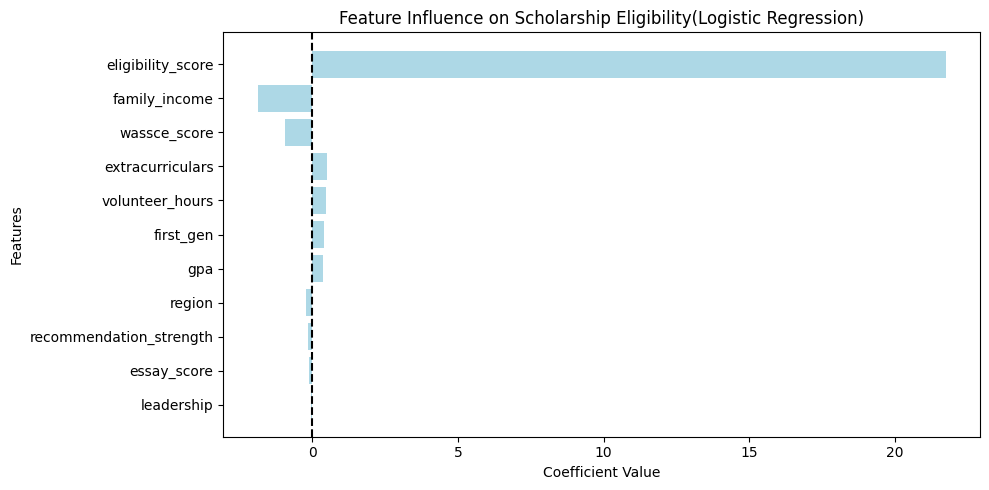

In [17]:

# Plot to visualize the features in order of importance
plt.figure(figsize=(10, 5))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='lightblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Influence on Scholarship Eligibility(Logistic Regression)')
plt.axvline(x=0, color='black', linestyle='--')
plt.gca().invert_yaxis()  # most important is at the top
plt.tight_layout()              
plt.show()


**Random forest Classifier, a ML Method for the model to be able to capture non-linear patterns and complex interactions that the LogisticRegressionCV might have missed**

**Random forest is an ensemble model that builds many decision trees and combines their predictions**



In [18]:
from sklearn.ensemble import RandomForestClassifier

# Improved Random Forest model for larger dataset
random_forest_model = RandomForestClassifier(
    n_estimators=200,        # More trees for better generalization
    max_depth=15,            # Restricts tree depth to prevent overfitting
    min_samples_split=10,    # Require more samples to split internal nodes
    min_samples_leaf=4,      # Require more samples at leaf nodes
    random_state=42,         # Reproducibility
    n_jobs=-1                # Use all CPU cores for faster training
)

# Fit the model to the training data
random_forest_model.fit(x_train, y_train)

# Make predictions on the validation set
random_f_val_pred = random_forest_model.predict(x_val)

# Evaluate the model's performance
print(f"Validation accuracy: {accuracy_score(y_val, random_f_val_pred):.2f}")
print(f"Validation precision: {precision_score(y_val, random_f_val_pred):.2f}")
print(f"Validation recall: {recall_score(y_val, random_f_val_pred):.2f}")
print(f"Confusion matrix:\n{confusion_matrix(y_val, random_f_val_pred)}")


Validation accuracy: 0.99
Validation precision: 0.99
Validation recall: 0.99
Confusion matrix:
[[ 722   25]
 [  24 3229]]


**Visualize the different Results of the LogisticRegressioncV and the RandomForest to appreciate any changes**
*The visualization shows a comparison of Logistic RegressionCV and Random Forest where Random Forest achieved higher accuracy, precision, and recall, making it a more effective model for predicting scholarship eligibility*

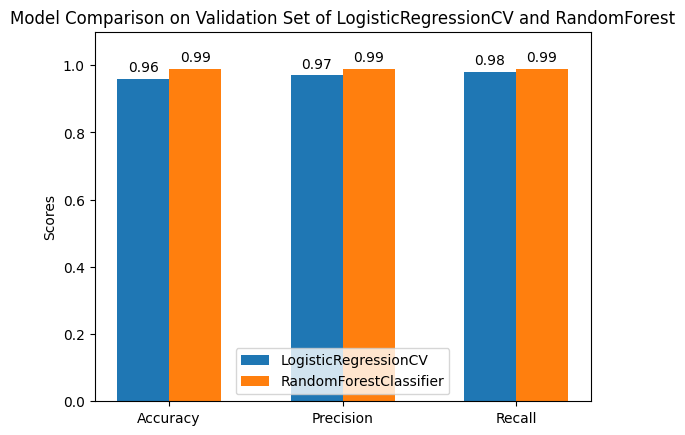

In [19]:
# names of metrics
metrics = ['Accuracy', 'Precision', 'Recall']

# scores for each ML method
logistic_scores = [0.96, 0.97, 0.98]
randomforest_scores = [0.99, 0.99, 0.99]

x = np.arange(len(metrics))  # Label locations
width = 0.30  # width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, logistic_scores, width, label='LogisticRegressionCV')
rects2 = ax.bar(x + width/2, randomforest_scores, width, label='RandomForestClassifier')

# axes labels, title and legend
ax.set_ylabel('Scores')
ax.set_title('Model Comparison on Validation Set of LogisticRegressionCV and RandomForest')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# display the values on top of the bars
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')

plt.ylim(0, 1.1)
plt.show()


***Ensemble Learning,*** *a model that combines multiple machine learning models to produce a stronger and more accurate final prediction than any single model alone.*

*It improves the overall performance by leveraging the strengths of individual ML methods that are used to train a model.*

*In this case, we are combining Logistic Regression and Random Forest  to create an ensemble model using a VotingClassifier. The main goal is to combine the individual models' predictions to make more accurate final predictions.*

In [20]:
from sklearn.ensemble import VotingClassifier

# create the ensemble learning model using the base models(Logistic Regression and Random Forest ) 
ensemble_model = VotingClassifier(
    estimators=[('log_reg', LogisticRegression_model),    # logistic regression model
                ('rf', random_forest_model)],       # random forest model
                weights=[1,2],
    voting='soft',   # uses predicted probabilities
n_jobs = -1)

# fit the ensemble model on training data
ensemble_model.fit(x_train, y_train)

# predict on the validation set
ensemble_val_pred = ensemble_model.predict(x_val)

# evaluate the performance of the ensemble model
print(f"Ensemble Validation Accuracy: {accuracy_score(y_val, ensemble_val_pred):.2f}")
print(f"Ensemble Validation Precision: {precision_score(y_val, ensemble_val_pred):.2f}")
print(f"Ensemble Validation Recall: {recall_score(y_val, ensemble_val_pred):.2f}")
print(f"Ensemble Confusion Matrix:\n{confusion_matrix(y_val, ensemble_val_pred)}")


Ensemble Validation Accuracy: 0.98
Ensemble Validation Precision: 0.99
Ensemble Validation Recall: 0.99
Ensemble Confusion Matrix:
[[ 711   36]
 [  31 3222]]


***Visaulize the ensemble Learning***
*The visualization demonstrates how the VotingClassifier ensemble model combines the predictions Logistic Regression and Random Forest.*

*The chart highlights:*
*The individual performance of each classifier (Logistic Regression and Random Forest) on key metrics (accuracy, precision, recall).*

8The reason is we want to appreciate how the ensemble model outperforms the individual classifiers*

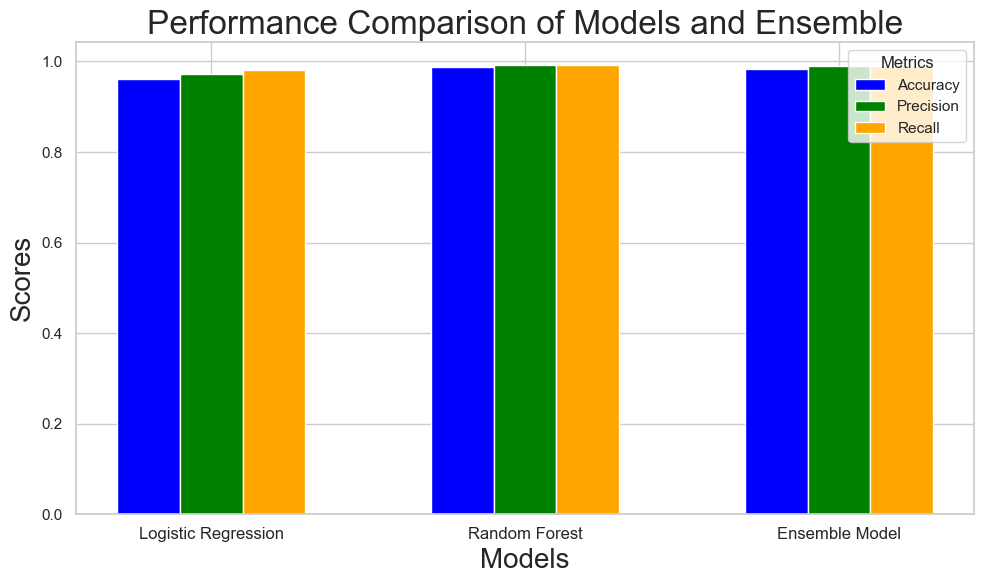

In [21]:
import seaborn as sns

# define the model names and their respective performance metrics
models = ['Logistic Regression', 'Random Forest', 'Ensemble Model']
accuracy = [accuracy_score(y_val, validate_pred_logRegCV),
            accuracy_score(y_val, random_f_val_pred),
            accuracy_score(y_val, ensemble_val_pred)]

precision = [precision_score(y_val, validate_pred_logRegCV),
             precision_score(y_val, random_f_val_pred),
             precision_score(y_val, ensemble_val_pred)]

recall = [recall_score(y_val, validate_pred_logRegCV),
          recall_score(y_val, random_f_val_pred),
          recall_score(y_val, ensemble_val_pred)]

# create a DataFrame to easily plot the data 

metrics_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall
})

# style of the plot
sns.set(style="whitegrid")

# create the plot with three bars for each model: Accuracy, Precision, Recall
fig, ax = plt.subplots(figsize=(10, 6))

# width of the bars and the positions
width = 0.2
x = range(len(models))

# plot each metric as a bar
ax.bar([p - width for p in x], metrics_df['Accuracy'], width=width, label='Accuracy', color='blue')
ax.bar(x, metrics_df['Precision'], width=width, label='Precision', color='green')
ax.bar([p + width for p in x], metrics_df['Recall'], width=width, label='Recall', color='orange')

#labels and titles
ax.set_xlabel('Models', fontsize=20)
ax.set_ylabel('Scores', fontsize=20)
ax.set_title('Performance Comparison of Models and Ensemble', fontsize=24)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)

ax.legend(title="Metrics")

plt.tight_layout() 
plt.show()


**Save the ensemble model**
*To avoid retraining the model evey time because it is usually time-consuming and requires access to the  training dataset.*

*Also, this allows for the model to be reused anywhere (Streamlit, websites, other apps).*

In [22]:
import joblib

# Save the trained ensemble model and scaler
joblib.dump(ensemble_model, 'ensemble_model.pkl') 


joblib.dump(scaler, 'scaler.pkl')



['scaler.pkl']